# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [209]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
print(birddata)
birddata.describe()


       altitude               date_time  device_info_serial   direction  \
0            71  2013-08-15 00:18:08+00                 851 -150.469753   
1            68  2013-08-15 00:48:07+00                 851 -136.151141   
2            68  2013-08-15 01:17:58+00                 851  160.797477   
3            73  2013-08-15 01:47:51+00                 851   32.769360   
4            69  2013-08-15 02:17:42+00                 851   45.191230   
...         ...                     ...                 ...         ...   
61915        11  2014-04-30 22:00:08+00                 833   45.448157   
61916         6  2014-04-30 22:29:57+00                 833 -112.073055   
61917         5  2014-04-30 22:59:52+00                 833   69.989037   
61918        16  2014-04-30 23:29:43+00                 833   88.376373   
61919         9  2014-04-30 23:59:34+00                 833  149.949008   

        latitude  longitude  speed_2d bird_name  
0      49.419860   2.120733  0.150000      Eric  

,altitude,device_info_serial,direction,latitude,longitude,speed_2d
count,61920.000000,61920.000000,61477.000000,61920.000000,61920.000000,61477.000000
mean,52.313275,849.328505,-4.610841,30.227762,-8.953367,2.558987
std,136.435498,12.835870,102.786009,14.809813,8.478471,3.576039
min,-1010.000000,833.000000,-179.997929,12.354424,-17.626145,0.000000
25%,2.000000,833.000000,-89.679759,15.393138,-16.761302,0.410000
50%,14.000000,851.000000,-10.983115,30.424481,-9.662089,1.209049
75%,84.000000,864.000000,81.964778,49.999572,2.603591,3.059444
max,6965.000000,864.000000,180.000000,51.518452,4.857561,63.488066


In [212]:
birddata["bird_name"].unique()

array(['Eric', 'Nico', 'Sanne'], dtype=object)

### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [183]:
grouped_birds = birddata.groupby("bird_name")
mean_speeds = grouped_birds.speed_2d.mean()
mean_altitudes = grouped_birds.altitude.mean()
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [104]:
birddata.date_time = pd.to_datetime(birddata.date_time)
birddata["date"] = birddata.date_time.dt.date
grouped_bydates = birddata.groupby("date")
mean_altitudes_perday = grouped_bydates.altitude.mean()

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [200]:
from datetime import datetime
grouped_birdday = birddata.groupby(["bird_name", "date"])
mean_altitudes_perday = grouped_birdday.altitude.mean()#.reset_index()
mean_altitudes_perday
# mean_altitudes_perday[(mean_altitudes_perday["bird_name"]=="Nico") & 
#                       (mean_altitudes_perday["date"]==datetime.strptime("2014-04-04", '%Y-%m-%d').date())]

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
                            ...    
Sanne      2014-04-26     17.116667
           2014-04-27     17.391892
           2014-04-28     58.876712
           2014-04-29     30.530120
           2014-04-30      4.361111
Name: altitude, Length: 770, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

           date  speed_2d
0    2013-08-15  2.856924
1    2013-08-16  3.386387
2    2013-08-17  3.123210
3    2013-08-18  2.785776
4    2013-08-19  2.920577
..          ...       ...
254  2014-04-26  2.192028
255  2014-04-27  2.582072
256  2014-04-28  3.055051
257  2014-04-29  2.793232
258  2014-04-30  3.297032

[259 rows x 2 columns]
           date  speed_2d
232  2014-04-04  2.832465


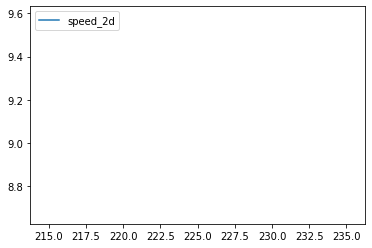

In [207]:
import matplotlib.pyplot as plt

# print(birddata)

eric_daily_speed  = birddata[(birddata["bird_name"] == "Eric")] # select rows
eric_daily_speed = eric_daily_speed[['speed_2d','date']] # select columns
eric_daily_speed =eric_daily_speed.groupby("date").mean()
eric_daily_speed = eric_daily_speed.reset_index()
eric_daily_speed = eric_daily_speed[eric_daily_speed["date"]==datetime.strptime("2014-04-04", '%Y-%m-%d').date()]

# sanne_daily_speed = birddata[(birddata["bird_name"] == "Sanne")]

nico_daily_speed = birddata[(birddata["bird_name"] == "Nico")] # select rows
nico_daily_speed = nico_daily_speed[['speed_2d','date']] # select columns
nico_daily_speed = nico_daily_speed.groupby("date").mean().reset_index()
print(nico_daily_speed)
nico_daily_speed = nico_daily_speed[nico_daily_speed["date"]==datetime.strptime("2014-04-04", '%Y-%m-%d').date()]
print(nico_daily_speed)



eric_daily_speed.plot(label="Eric")
# # sanne_daily_speed.plot(label="Sanne")
# # nico_daily_speed.plot(label="Nico")

plt.legend(loc="upper left")
plt.show()